<a href="https://colab.research.google.com/github/jsebastianquiroga/IMAGE_VIDEO_PROCESSING_PUJ/blob/main/Talleres/taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Lista de rutas de las imágenes
imagen_paths = [f'fotos/calibracion/{i}.jpg' for i in range(1, 27)]  # Ruta relativa (ajusta si es necesario)

# Seleccionar 4 imágenes al azar
rutas_aleatorias = random.sample(imagen_paths, 4)

for ruta in rutas_aleatorias:
    imagen = cv2.imread(ruta)
    
    if imagen is None:
        print(f"No se pudo cargar la imagen desde {ruta}. Verifica la ruta o integridad del archivo.")
        continue
    
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.title(f'Imagen desde {ruta}')
    plt.show()


No se pudo cargar la imagen desde fotos/calibracion/8.jpg. Verifica la ruta o integridad del archivo.
No se pudo cargar la imagen desde fotos/calibracion/1.jpg. Verifica la ruta o integridad del archivo.
No se pudo cargar la imagen desde fotos/calibracion/5.jpg. Verifica la ruta o integridad del archivo.
No se pudo cargar la imagen desde fotos/calibracion/7.jpg. Verifica la ruta o integridad del archivo.


[ WARN:0@230.309] global loadsave.cpp:248 findDecoder imread_('fotos/calibracion/8.jpg'): can't open/read file: check file path/integrity
[ WARN:0@230.309] global loadsave.cpp:248 findDecoder imread_('fotos/calibracion/1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@230.310] global loadsave.cpp:248 findDecoder imread_('fotos/calibracion/5.jpg'): can't open/read file: check file path/integrity
[ WARN:0@230.310] global loadsave.cpp:248 findDecoder imread_('fotos/calibracion/7.jpg'): can't open/read file: check file path/integrity


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Lista de rutas de las imágenes
imagen_paths = [f'/fotos/calibracion/{i}.jpg' for i in range(1, 27)]  # Asumiendo que tus imágenes están enumeradas de 1 a 25.

# Seleccionar 4 imágenes al azar
rutas_aleatorias = random.sample(imagen_paths, 4)

for ruta in rutas_aleatorias:
    imagen = cv2.imread(ruta)
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.title(f'Imagen desde {ruta}')
    plt.show()

[ WARN:0@0.376] global loadsave.cpp:248 findDecoder imread_('/fotos/calibracion/3.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
import numpy as np
import cv2 as cv
import glob
import random

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# Listar las imágenes que subiste a Google Colab
images = [f"/fotos/calibracion/{i}.jpg" for i in range(1, 27)]

# Selecciona 4 imágenes aleatoriamente
selected_images = random.sample(images, 4)

for fname in selected_images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,6), None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        cv.drawChessboardCorners(img, (7,6), corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(500)

cv.destroyAllWindows()

In [ ]:
import numpy as np
import cv2 as cv
import glob
import random
import matplotlib.pyplot as plt

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# Listar las imágenes que subiste a Google Colab
images = [f"{i}.jpg" for i in range(1, 16)]

# Selecciona 4 imágenes aleatoriamente
selected_images = random.sample(images, 4)

for fname in selected_images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,6), None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)

        # Draw the corners on the image
        cv.drawChessboardCorners(img, (7,6), corners2, ret)

        # Display the image using matplotlib
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title(fname)
        plt.show()


# Calibrar la cámara usando los puntos del objeto y de la imagen
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


print("Matriz de la cámara (mtx):")
print(mtx)
print("\nCoeficientes de distorsión (dist):")
print(dist)

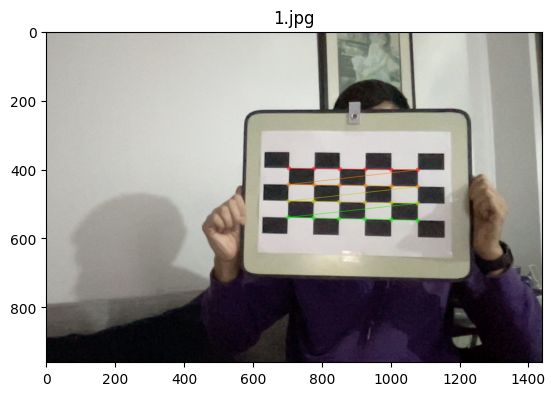

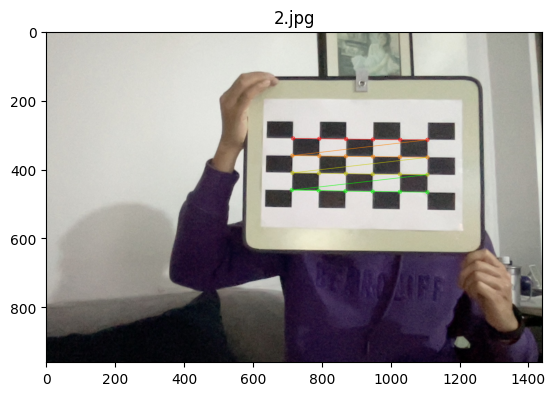

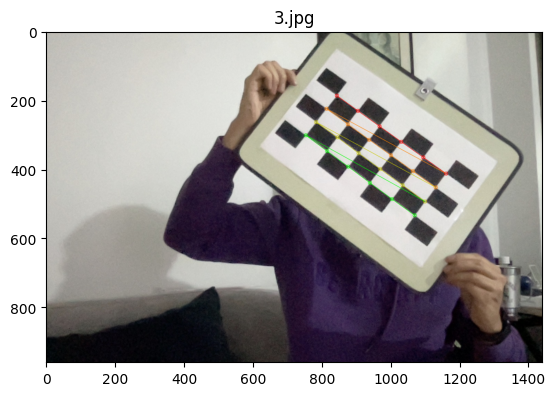

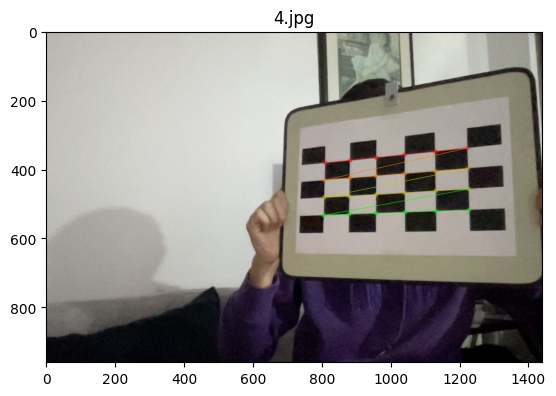

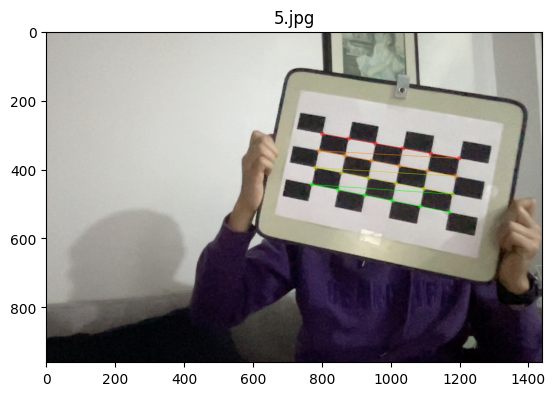

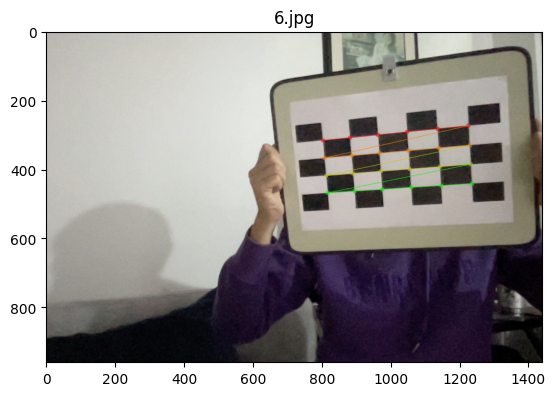

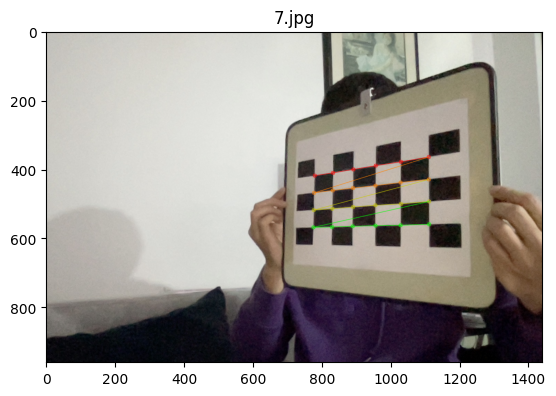

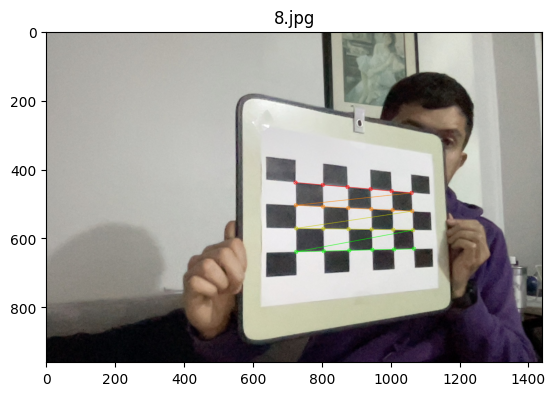

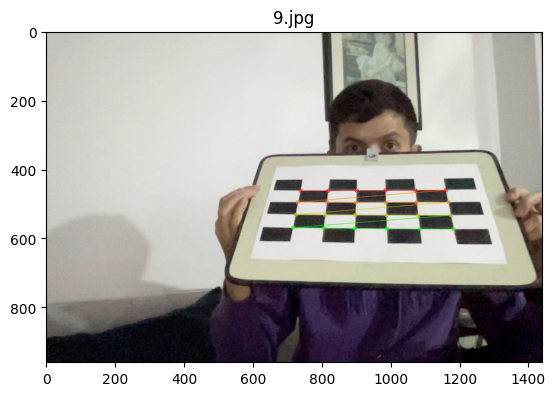

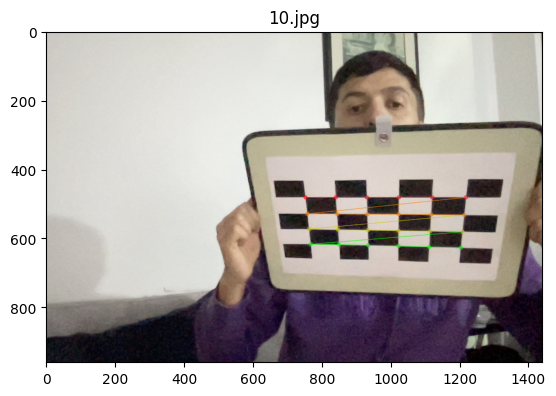

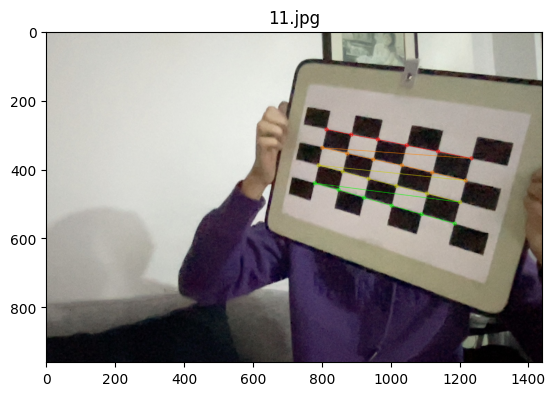

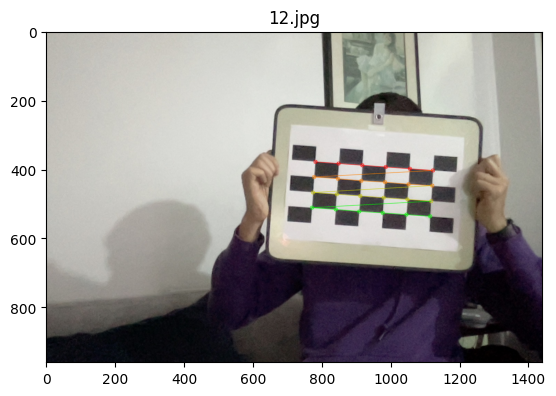

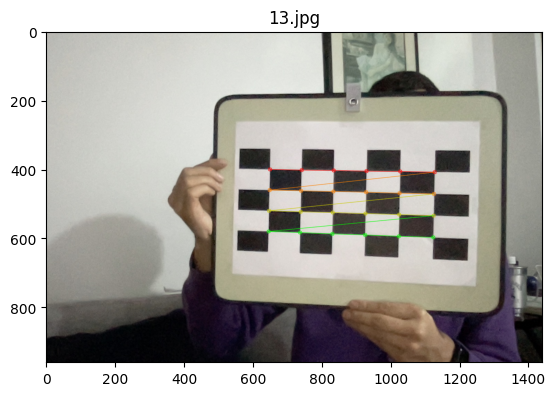

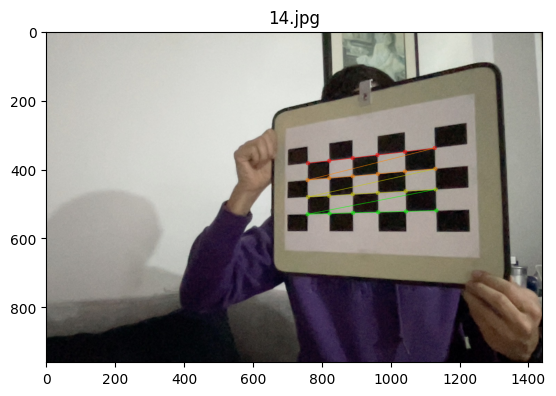

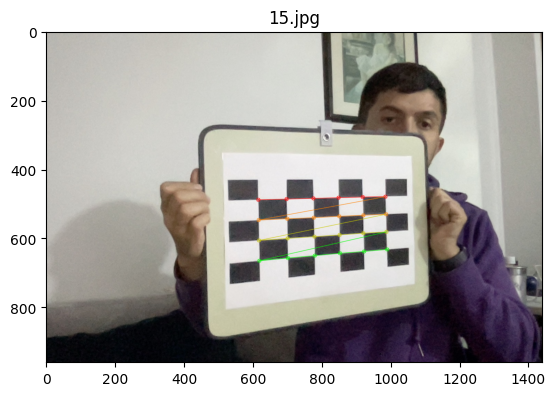

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random

# Listar las imágenes que subiste a Google Colab
images = [f"{i}.jpg" for i in range(1, 27)]

# Seleccionar una muestra aleatoria de 4 imágenes
random_sample = random.sample(images, 4)

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,4,0)
objp = np.zeros((4*6,3), np.float32)
objp[:,:2] = np.mgrid[0:6,0:4].T.reshape(-1,2)

# Arrays to store object points and image points
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

for fname in random_sample:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (6,4), None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)

        # Draw and display the corners using matplotlib
        img_with_corners = cv.drawChessboardCorners(img.copy(), (6,4), corners2, ret)
        plt.imshow(cv.cvtColor(img_with_corners, cv.COLOR_BGR2RGB))
        plt.title(fname)
        plt.show()
    else:
        print(f"No se detectaron esquinas en {fname}")


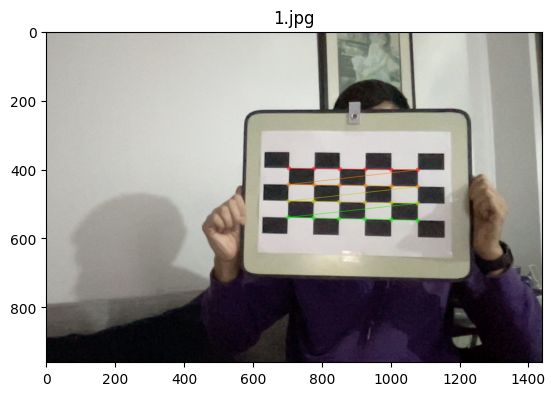

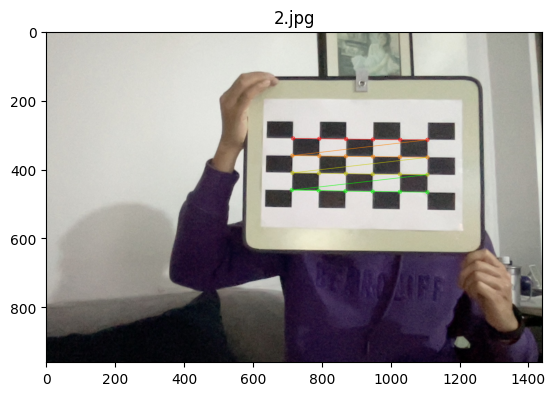

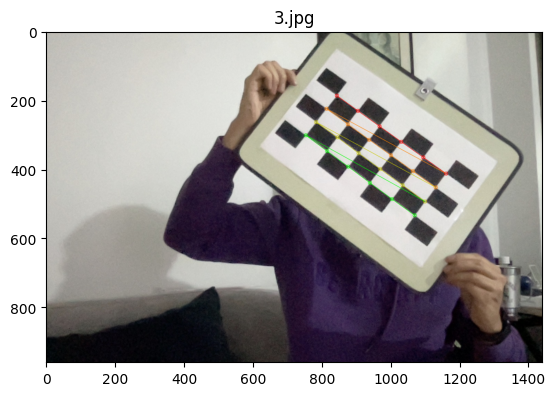

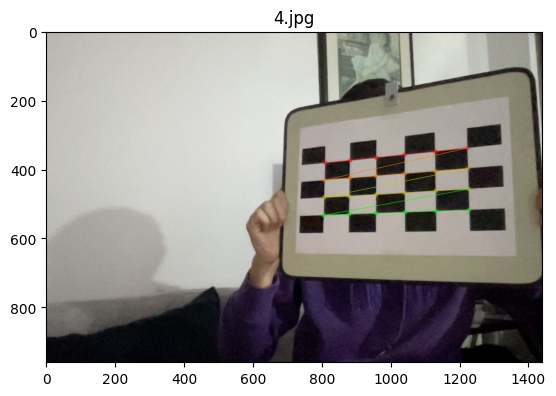

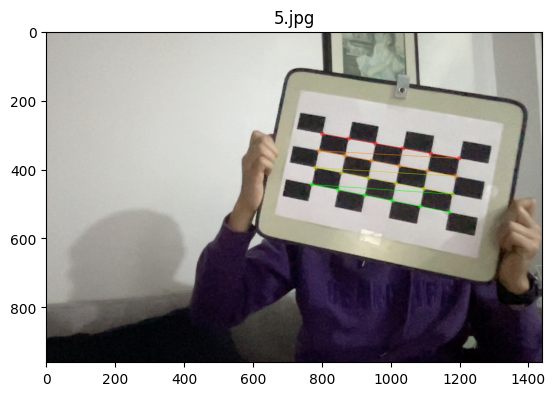

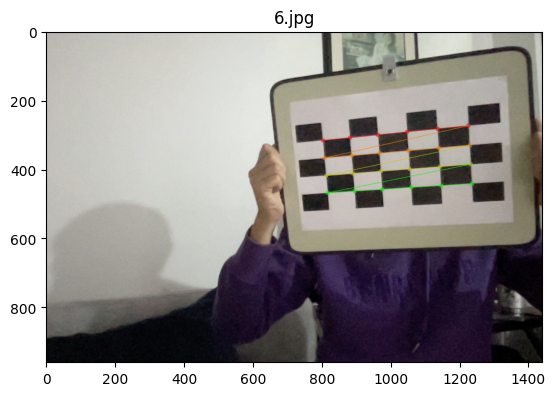

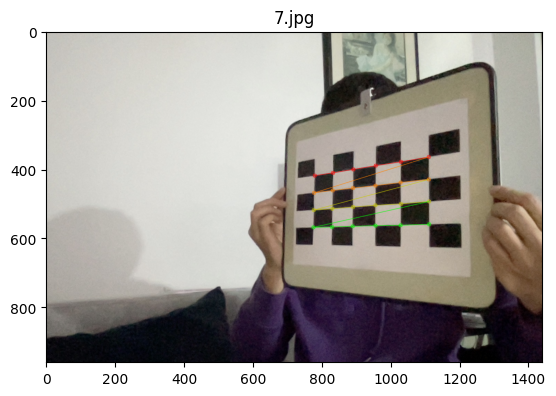

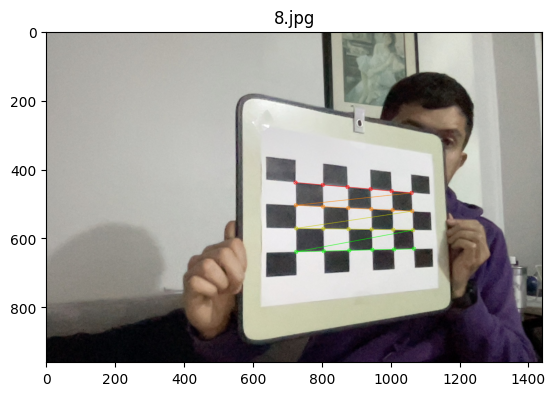

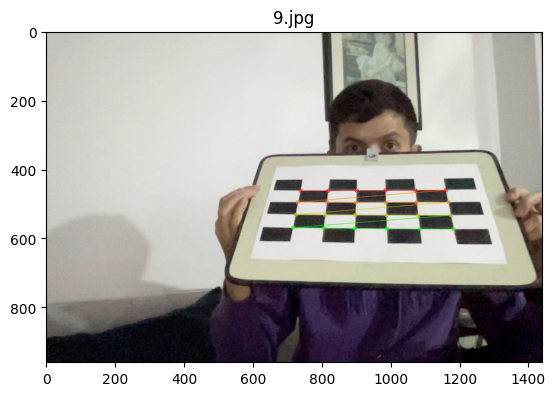

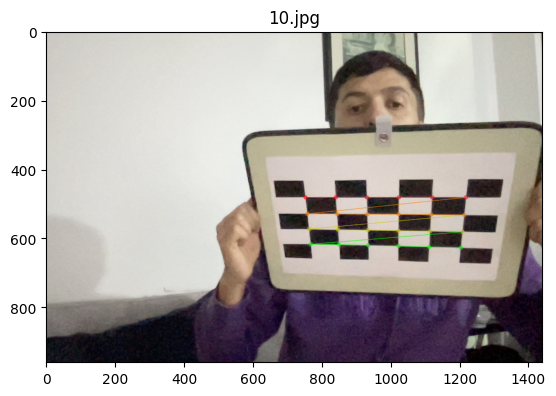

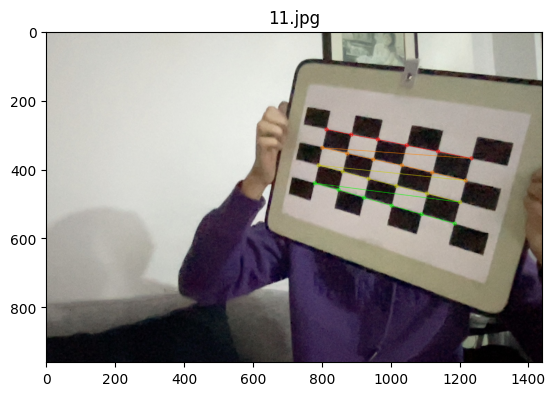

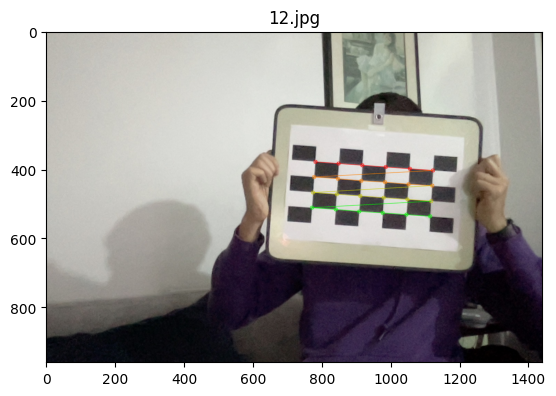

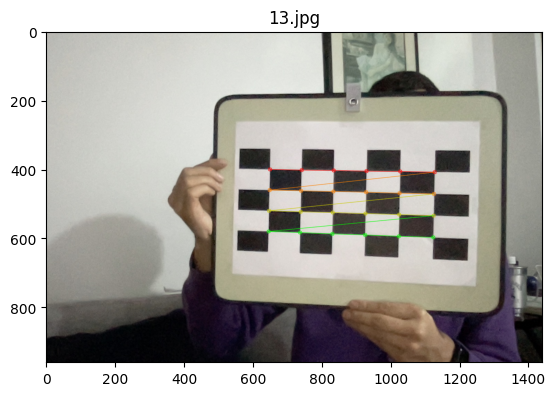

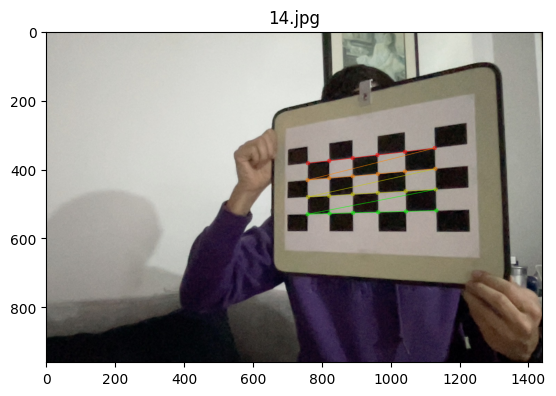

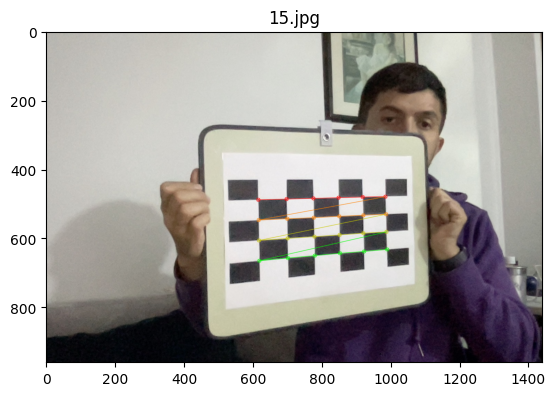

Matriz de la cámara (mtx):
[[2.02489273e+03 0.00000000e+00 6.91086187e+02]
 [0.00000000e+00 1.31762923e+03 3.46078955e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Coeficientes de distorsión (dist):
[[ 9.99309843e-01 -1.23879899e+01 -4.07120743e-02  3.50683822e-02
   5.83339645e+01]]


In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Listar las imágenes que subiste a Google Colab
images = [f"{i}.jpg" for i in range(1, 16)]

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,4,0)
objp = np.zeros((4*6,3), np.float32)
objp[:,:2] = np.mgrid[0:6,0:4].T.reshape(-1,2)

# Arrays to store object points and image points
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (6,4), None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)

        # Draw and display the corners using matplotlib
        img_with_corners = cv.drawChessboardCorners(img.copy(), (6,4), corners2, ret)
        plt.imshow(cv.cvtColor(img_with_corners, cv.COLOR_BGR2RGB))
        plt.title(fname)
        plt.show()
    else:
        print(f"No se detectaron esquinas en {fname}")




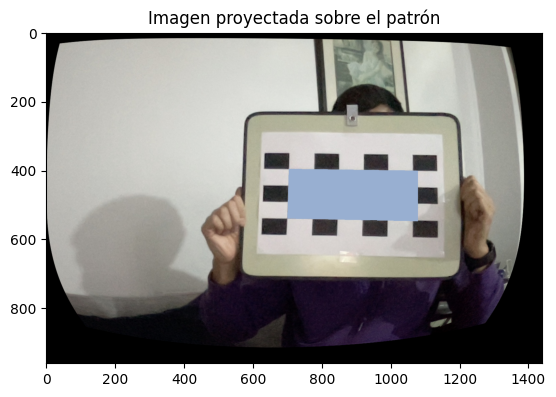

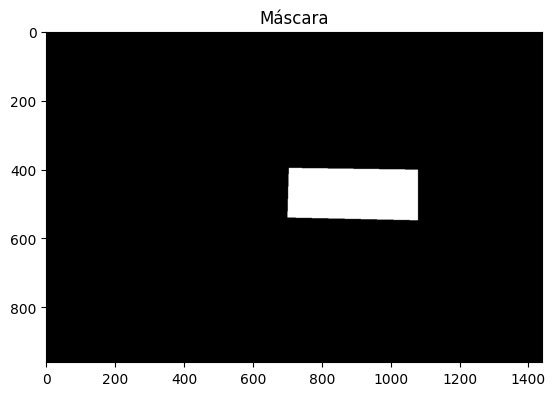

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Función para proyectar una imagen sobre el patrón detectado
def project_image_on_pattern(src_image, corners, image_to_project):
    # Verificación del formato de la imagen a proyectar
    if image_to_project.shape[2] == 4:
        image_to_project = cv.cvtColor(image_to_project, cv.COLOR_BGRA2BGR)

    # Definir los puntos de origen (las 4 esquinas del patrón detectado)
    src_pts = np.array([corners[0], corners[5], corners[-1], corners[-6]], dtype=np.float32)

    # Definir los puntos de destino (las esquinas de la imagen a proyectar)
    h, w = image_to_project.shape[:2]
    dst_pts = np.array([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]], dtype=np.float32)

    # Obtener la matriz de homografía
    M, _ = cv.findHomography(src_pts, dst_pts)

    # Aplicar warpPerspective para proyectar la imagen
    warped_image = cv.warpPerspective(image_to_project, M, (src_image.shape[1], src_image.shape[0]))

    # Crear una máscara de la imagen proyectada
    mask = np.zeros_like(src_image, dtype=np.uint8)
    cv.fillConvexPoly(mask, np.int32(src_pts.reshape(-1, 2)), (255,255,255))

    # Asegurarse de que la máscara y la imagen tengan las mismas dimensiones
    if mask.shape[:2] != src_image.shape[:2]:
        mask = cv.resize(mask, (src_image.shape[1], src_image.shape[0]))

    # Combinar las imágenes usando la máscara
    combined_image = cv.bitwise_and(src_image, 255-mask) + cv.bitwise_and(warped_image, mask)

    return combined_image, mask, M

# Carga la imagen que deseas proyectar
image_to_project = cv.imread("/content/fishes.webp")

# Por simplicidad, proyectaremos la imagen sobre la primera imagen donde se detectó el patrón
img = cv.imread(images[0])
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, corners = cv.findChessboardCorners(gray, (6,4), None)
if ret == True:
    corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)

    # Deshacer la distorsión de la imagen original
    img_undistorted = cv.undistort(img, mtx, dist, None, mtx)

    result_image, mask, M = project_image_on_pattern(img_undistorted, corners2.reshape(-1, 2), image_to_project)

    plt.imshow(cv.cvtColor(result_image, cv.COLOR_BGR2RGB))
    plt.title("Imagen proyectada sobre el patrón")
    plt.show()

    # Visualizar la máscara
    plt.imshow(mask, cmap='gray')
    plt.title("Máscara")
    plt.show()

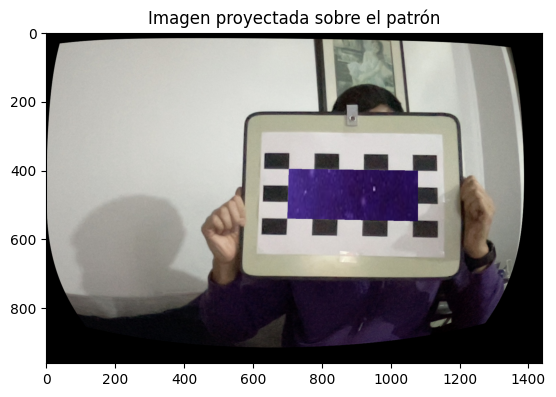

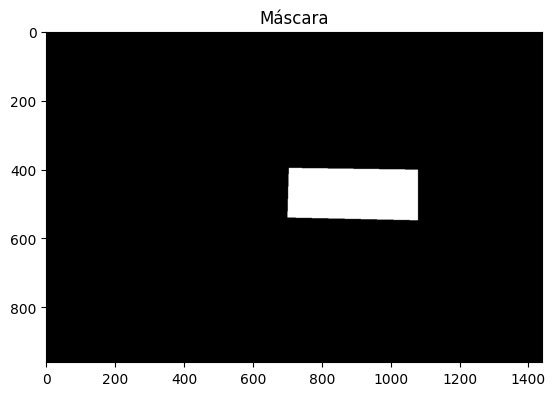

Advertencia: La relación de aspecto del área del patrón y la imagen difieren significativamente.
Error de reproyección: 1.0149483521421782e-13
La matriz de homografía parece ser adecuada.


In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Función para proyectar una imagen sobre el patrón detectado
def project_image_on_pattern(src_image, corners, image_to_project):
    # Verificación del formato de la imagen a proyectar
    if image_to_project.shape[2] == 4:
        image_to_project = cv.cvtColor(image_to_project, cv.COLOR_BGRA2BGR)

    # Definir los puntos de origen (las 4 esquinas del patrón detectado)
    src_pts = np.array([corners[0], corners[5], corners[-1], corners[-6]], dtype=np.float32)

    # Definir los puntos de destino (las esquinas de la imagen a proyectar)
    h, w = image_to_project.shape[:2]
    dst_pts = np.array([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]], dtype=np.float32)

    # Obtener la matriz de homografía
    M, _ = cv.findHomography(src_pts, dst_pts)

    # Aplicar warpPerspective para proyectar la imagen
    warped_image = cv.warpPerspective(image_to_project, M, (src_image.shape[1], src_image.shape[0]))

    # Crear una máscara de la imagen proyectada
    mask = np.zeros_like(src_image, dtype=np.uint8)
    cv.fillConvexPoly(mask, np.int32(src_pts.reshape(-1, 2)), (255,255,255))

    # Asegurarse de que la máscara y la imagen tengan las mismas dimensiones
    if mask.shape[:2] != src_image.shape[:2]:
        mask = cv.resize(mask, (src_image.shape[1], src_image.shape[0]))

    # Combinar las imágenes usando la máscara
    combined_image = cv.bitwise_and(src_image, 255-mask) + cv.bitwise_and(warped_image, mask)

    return combined_image, mask, M

# Función para validar dimensiones de la imagen
def validate_image_dimensions(pattern_area, image_to_project):
    # Calcular la relación de aspecto
    pattern_aspect_ratio = (pattern_area[1][0] - pattern_area[0][0]) / (pattern_area[2][1] - pattern_area[0][1])
    image_aspect_ratio = image_to_project.shape[1] / image_to_project.shape[0]

    # Comprobar si la relación de aspecto es similar (con un margen)
    if 0.9 <= pattern_aspect_ratio / image_aspect_ratio <= 1.1:
        print("La relación de aspecto es adecuada.")
    else:
        print("Advertencia: La relación de aspecto del área del patrón y la imagen difieren significativamente.")

# Función para validar la matriz de homografía
def validate_homography_matrix(M, src_pts, dst_pts):
    # Proyectar los puntos de origen a través de la matriz de homografía
    projected_pts = cv.perspectiveTransform(src_pts.reshape(-1, 1, 2), M)

    # Calcular el error de reproyección
    reprojection_error = np.sqrt(np.sum(np.square(projected_pts - dst_pts.reshape(-1, 1, 2)))) / 4
    print(f"Error de reproyección: {reprojection_error}")
    if reprojection_error < 1:  # Tolerancia de 1 pixel
        print("La matriz de homografía parece ser adecuada.")
    else:
        print("Advertencia: La matriz de homografía podría no ser precisa.")

# Carga la imagen que deseas proyectar
image_to_project = cv.imread("/content/tunnel.jpeg")

# Por simplicidad, proyectaremos la imagen sobre la primera imagen donde se detectó el patrón
img = cv.imread(images[0])
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, corners = cv.findChessboardCorners(gray, (6,4), None)
if ret == True:
    corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)

    # Deshacer la distorsión de la imagen original
    img_undistorted = cv.undistort(img, mtx, dist, None, mtx)

    result_image, mask, M = project_image_on_pattern(img_undistorted, corners2.reshape(-1, 2), image_to_project)

    plt.imshow(cv.cvtColor(result_image, cv.COLOR_BGR2RGB))
    plt.title("Imagen proyectada sobre el patrón")
    plt.show()

    # Visualizar la máscara
    plt.imshow(mask, cmap='gray')
    plt.title("Máscara")
    plt.show()

    # Validaciones
    validate_image_dimensions(corners2.reshape(-1, 2), image_to_project)
    validate_homography_matrix(M, np.array([corners2[0], corners2[5], corners2[-1], corners2[-6]]), np.array([[0, 0], [image_to_project.shape[1]-1, 0], [image_to_project.shape[1]-1, image_to_project.shape[0]-1], [0, image_to_project.shape[0]-1]]))

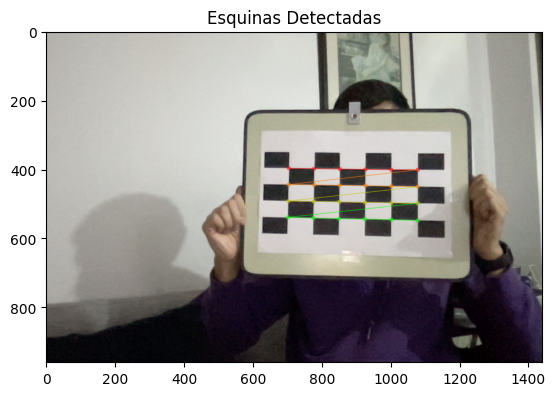

In [ ]:
import cv2 as cv
import numpy as np
# ... [Otras importaciones y funciones necesarias, como 'project_image_on_pattern']

def activate_real_time_projection(image_to_project_path):
    # Carga la imagen que deseas proyectar
    image_to_project = cv.imread(image_to_project_path)

    # Inicializa la captura de video
    cap = cv.VideoCapture(0)
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        ret, corners = cv.findChessboardCorners(gray, (6,4), None)
        if ret == True:
            corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
            frame_undistorted = cv.undistort(frame, mtx, dist, None, mtx)
            result_image, _, _ = project_image_on_pattern(frame_undistorted, corners2.reshape(-1, 2), image_to_project)
            cv.imshow('Real-time Projection', result_image)
        else:
            cv.imshow('Real-time Projection', frame)

        # Presiona la tecla 'q' para salir del bucle
        if cv.waitKey(1) & 0xFF == ord('q'):
            break

    # Libera recursos
    cap.release()
    cv.destroyAllWindows()

# Para ejecutar la función
if __name__ == '__main__':
    activate_real_time_projection("/path/to/your/image_to_project.jpg")
